<a href="https://colab.research.google.com/github/MiguelAngel-ht/Quantum-Computing/blob/main/Quantum-Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import output     # clear output when is not necessary

In [ ]:
!pip install qiskit                   
!pip install qiskit[visualization]   # Qiskit to parameter "mpl" works in colab
output.clear()

In [ ]:
# basic libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
lista = np.ones((8),dtype='int')
for i in [2,3,4]:
  lista[i] = -1
lista

array([ 1,  1, -1, -1, -1,  1,  1,  1])

In [ ]:
# Import oracle and Grover operator
from qiskit.circuit.library import Diagonal, GroverOperator

def grover_operator(n_iterations, list_qbits, comb):
    """
        Grover iteration circuit for oracle with 5/16 solutions
        
        Args:
            n_iterations (int): number of times to repeat the circuit
        Returns:
            Gate that implements n_iterations of the Grover operator
    """
    diag = np.ones((comb),dtype='int')
    for i in list_qbits:
      diag[i] = -1
    oracle = Diagonal(diag)
    grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
    grover_it.label = f"Grover$^{n_iterations}$"

    return grover_it

In [ ]:
# import quantum phase transform
from qiskit.circuit.library import QFT

n_qbits = 8
qft_dagger = QFT(n_qbits, inverse=True).to_gate()
qft_dagger.label = "QFT†"

0
1
2
3
4
5
6
7


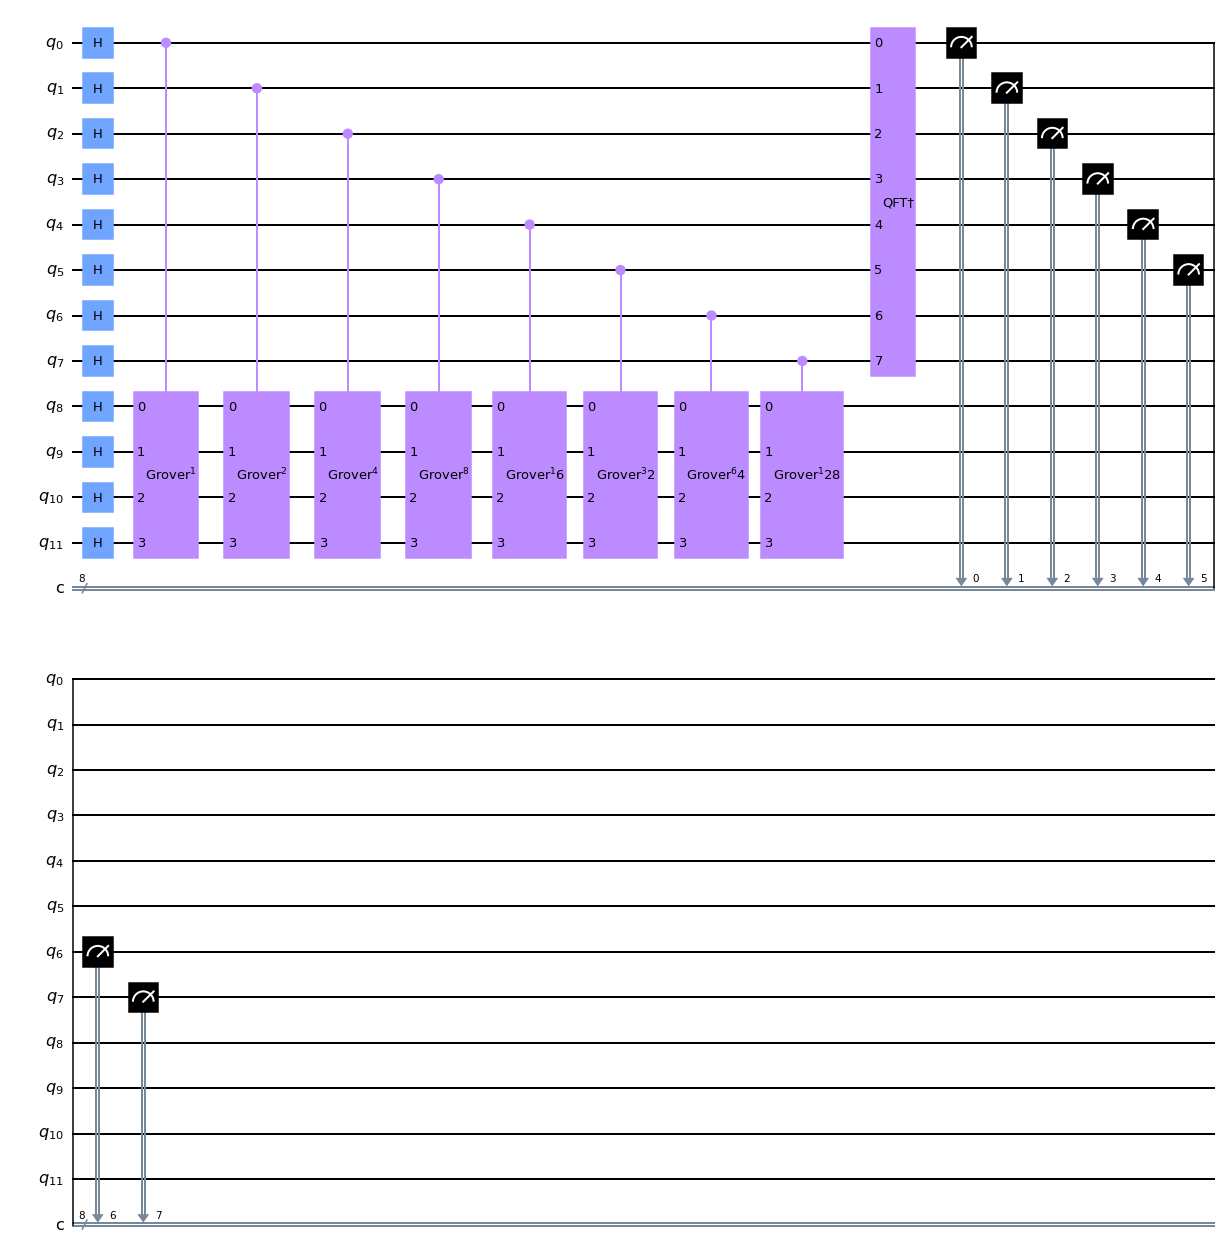

In [ ]:
# Create QuantumCircuit
t = 8   # no. of counting qubits
n = 4   # no. of searching qubits
qc = QuantumCircuit(n+t, t) # Circuit with n+t qubits and t classical bits

# Initialize all qubits to |+>
for qubit in range(t+n):
    qc.h(qubit)

# Begin controlled Grover iterations
n_iterations = 1
list_qbits = [2,5,6,8,10,12]
for qubit in range(t):
    cgrit = grover_operator(n_iterations, list_qbits, 2**n).control()
    #print(qubit, list(range(t, n+t)))
    qc.append(cgrit, [qubit] + list(range(t, n+t)))
    n_iterations *= 2
    print(qubit)
    
# Do inverse QFT on counting qubits
qc.append(qft_dagger, range(t))

# Measure counting qubits
qc.measure(range(t), range(t))

# Display the circuit
qc.draw('mpl')

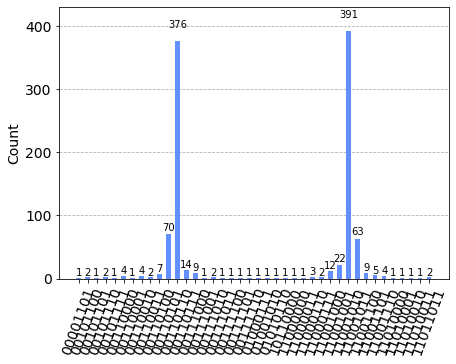

In [ ]:
# Execute and see results
sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
job = sim.run(transpiled_qc)
hist = job.result().get_counts()
plot_histogram(hist)

In [ ]:
measured_str = max(hist, key=hist.get)
measured_int = int(measured_str, 2)
print("Register Output = %i" % measured_int)

Register Output = 202


In [ ]:
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    print(f"No. of Solutions = {M:.1f}")
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)

In [ ]:
calculate_M(measured_int, t, n)

Theta = 4.95783
No. of Solutions = 6.1
Error < 0.11
